# Python program for replicating Figure 1.5 from *The Conquest of American Inflation* by Thomas Sargent.

In Figure 1.5, Sargent compares the business cycle componenets of monthly inflation and unemployment data for the US from 1960-1982. This program produces a replication of Figure 1.5 (among other things) by using the fredpy package to import data from inflation and unemployment data from Federeal Reserve Economic Data (FRED), manage the data, and then plot the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fredpy import series,window_equalize
%matplotlib inline

## Data

### Importing the data

As his measure of the unemployment rate, Sargent uses the unemployment rate for white men age 20 and over (FRED code: LNS14000028). The results are essentially identical if the unemployment rate of the over 16 non-institutional population (FRED code: UNRATE) is used. His measure of the inflation rate is a 13-month two-sided moving average of the annualized monthly percentage change in the CPI. The unemployment and inflation rate data are monthly.

### Detrending procedures

Sargent isolates the business cycle components of the data using the bandpass filter of Baxter and King (1995). Since the data are monthly, the minimum frequency is set to 24 months, the maximum is set to 84 months, and the lag-lead truncation to 84. Additionally, I also detrend the data using the Hodrick-Prescott filter (1997). The striking loops in Sargent's Figure 1.5 *are sensitive* to the filtering procedure used.

In [2]:
# Dowload data
u = series('LNS14000028')
p = series('CPIAUCSL')

# Construct the inflation series
p.pc(annualized=True)
p.ma2side(length=6)
p.data = p.ma2data
p.datenumbers = p.ma2datenumbers
p.dates = p.ma2dates

# Make sure that the data inflation and unemployment series cver the same time interval
window_equalize([p,u])

# Filter the data
p.bpfilter(low=24,high=84,K=84)
p.hpfilter(lamb=129600)
u.bpfilter(low=24,high=84,K=84)
u.hpfilter(lamb=129600)

## Plots

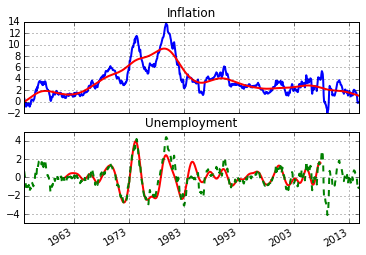

In [3]:
# BP-filtered data
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot_date(p.datenumbers,p.data,'b-',lw=2)
ax.plot_date(p.datenumbers,p.hptrend,'r-',lw=2)
ax.grid(True)
ax.set_title('Inflation')

ax = fig.add_subplot(2,1,2)
ax.plot_date(p.bpdatenumbers,p.bpcycle,'r-',lw=2)
ax.plot_date(p.datenumbers,p.hpcycle,'g--',lw=2)
ax.grid(True)
ax.set_title('Unemployment')

fig.autofmt_xdate()

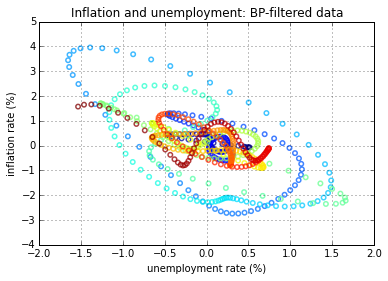

In [4]:
# Scatter plot of BP-filtered inflation and unemployment data (Sargent's Figure 1.5)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
t = np.arange(len(u.bpcycle))
ax.scatter(u.bpcycle,p.bpcycle,facecolors='none',alpha=0.75,s=20,c=t, linewidths=1.5)
ax.set_xlabel('unemployment rate (%)')
ax.set_ylabel('inflation rate (%)')
ax.set_title('Inflation and unemployment: BP-filtered data')
ax.grid(True)

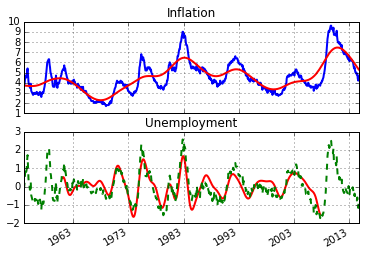

In [5]:
# HP-filtered data
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot_date(u.datenumbers,u.data,'b-',lw=2)
ax.plot_date(u.datenumbers,u.hptrend,'r-',lw=2)
ax.grid(True)
ax.set_title('Inflation')

ax = fig.add_subplot(2,1,2)
ax.plot_date(u.bpdatenumbers,u.bpcycle,'r-',lw=2)
ax.plot_date(u.datenumbers,u.hpcycle,'g--',lw=2)
ax.grid(True)
ax.set_title('Unemployment')

fig.autofmt_xdate()

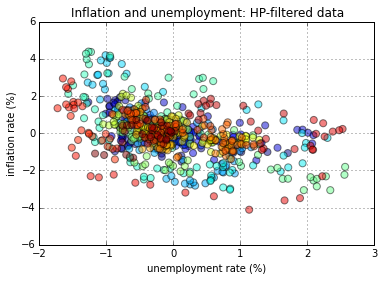

In [6]:
# Scatter plot of HP-filtered inflation and unemployment data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
t = np.arange(len(u.hpcycle))
ax.scatter(u.hpcycle,p.hpcycle,alpha=0.5,s=50,c=t)
ax.set_xlabel('unemployment rate (%)')
ax.set_ylabel('inflation rate (%)')
ax.set_title('Inflation and unemployment: HP-filtered data')
ax.grid(True)

## Remarks

There is a visible downward-sloping relationship between the inflation rate and the rate of unemployment over the business cycle. The relationship is less-pronounced under HP filtering relative to the relationship revealed by BP filtering. The so-called Phillips loops are not apparent in the HP-filtered data.